<h1><b><center>GROUP PROJECT 

Team Name:  **DATA ANALYZING PIRATES**<br>
Team Members:<br>
1) **Michael Moorman**<br>
2) **Abraar Patel**<br>
3) **Dosbol Aliev**<br>
4) **Kurmanbek Bazarov**<br>






The dataset chosen for this group project is **Chest CT-Scan Images dataset** from Kaggle. The dataset contains train, test, valid folders. The train folder consists of the training images. The test folder consists of testing images and the valid folder consists of validating images.  The dataset contains 4 categories of chest CT-scan images namely, adenocarcinoma, large cell carcinoma, squamous cell carcinomal, normal chest CT-Scan.
This project focuses on detection of lung cancer using **CNN methods**. We will be creating deep learning models and investigating CNN to classify the chest CT-Scan images and diagnose if a person has lung cancer or not.

<h3><b>IMPORTING REQUIRED LIBRARIES</b></h3>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import plotly.express as px
from sklearn.metrics import confusion_matrix

<h3><b> MOUNTING GOOGLE DRIVE TO GOOGLE COLAB</b></h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Insert the directory
import sys
collab_dir = '/content/drive/MyDrive/Chest CT-Scan Images Data/'
sys.path.insert(0,collab_dir)
os.chdir(collab_dir)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3><b>UPLOADING DATASET VIA KAGGLE API</b></h3>

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Chest CT-Scan Images Data"

%cd /content/drive/MyDrive/Chest CT-Scan Images Data/

In [ ]:
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

In [ ]:
from zipfile import ZipFile

file_name = "chest-ctscan-images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall();
  print("Done unzipping the folder")

<h3><b>TRAINING THE BASIC CNN MODELS</b></h3>

In [ ]:
from load_tensors import load_data
# Different models
#import models.basic_cnn as model1
import models.basic_cnn_with_validation as model2
import models.bigger_cnn_valid as model3
# Visualization of train/validation loss
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
EPOCHS=20
BATCH_SIZE=16

(300, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 299, 8)       56        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 149, 8)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 148, 8)        392       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 74, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28416)             0         
                                                                 
 dense (Dense)               (None, 64)        

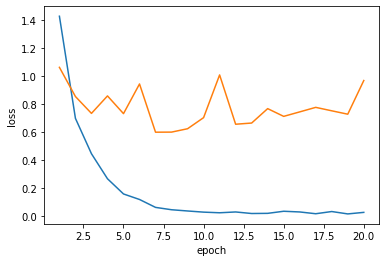

In [ ]:
model = model2.create_model()
train_history, test_loss, test_accuracy, test_auc = model2.train(model, epochs=EPOCHS, batch_size=BATCH_SIZE)
ttc_df = pd.DataFrame(train_history.history)
ttc_df['epoch'] = range(1,EPOCHS+1)
ax = sns.lineplot(data=ttc_df, x='epoch', y='loss')
sns.lineplot(data=ttc_df, x='epoch', y='val_loss', ax=ax)
plt.show()

(300, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 299, 16)      112       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 149, 16)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 148, 16)       1552      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 46, 73, 16)        1552      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 36, 

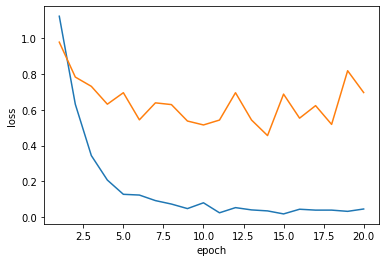

In [ ]:
model = model3.create_model()
train_history, test_loss, test_accuracy, test_auc = model3.train(model, epochs=EPOCHS, batch_size=BATCH_SIZE)
ttc_df = pd.DataFrame(train_history.history)
ttc_df['epoch'] = range(1,EPOCHS+1)
ax = sns.lineplot(data=ttc_df, x='epoch', y='loss')
sns.lineplot(data=ttc_df, x='epoch', y='val_loss', ax=ax)
plt.show()

In [ ]:
# Specifying the dataset paths

train_path = "/content/Data/train"
valid_path = "/content/Data/valid"
test_path = "/content/Data/test"

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
### Hypertuning with multiple parameters

In [ ]:
# For installing Keras tuner
# !pip install keras-tuner -q

# SVM CODE

In [ ]:
import models.svm_model as model4

In [ ]:
svm_model = model4.create_model()

We are loading X from x_flat.pickle and y from y.pickle
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ....C=1, gamma=0.0001, kernel=poly;, score=0.646 total time=  57.7s
[CV 2/3] END ....C=1, gamma=0.0001, kernel=poly;, score=0.689 total time=  50.9s
[CV 3/3] END ....C=1, gamma=0.0001, kernel=poly;, score=0.671 total time=  53.8s
[CV 1/3] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.507 total time=  56.7s
[CV 2/3] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.482 total time=  57.1s
[CV 3/3] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.474 total time=  58.5s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.563 total time= 2.6min
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.544 total time= 2.6min
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.548 total time= 1.9min
[CV 1/3] END .....C=1, gamma=0.001, kernel=poly;, score=0.886 total time=  53.2s
[CV 2/3] END .....C=1, gamma=0.001, kernel=poly;, score=0.855 total time=

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[53,  0,  1,  0],
       [ 0, 51, 31,  8],
       [ 3, 40, 49, 28],
       [ 1,  7,  6, 37]], dtype=int32)>

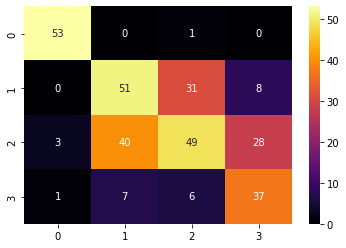

In [ ]:
model4.train(svm_model)

# RFC CODE

In [ ]:
import models.rfc_model as model5

In [ ]:
rfc_model = model5.create_model()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=5, max_features=auto, max_samples=0.5, n_estimators=55;, score=0.747 total time=   1.5s
[CV 2/3] END max_depth=5, max_features=auto, max_samples=0.5, n_estimators=55;, score=0.732 total time=   1.4s
[CV 3/3] END max_depth=5, max_features=auto, max_samples=0.5, n_estimators=55;, score=0.746 total time=   1.4s
[CV 1/3] END max_depth=7, max_features=auto, max_samples=0.5, n_estimators=90;, score=0.734 total time=   2.6s
[CV 2/3] END max_depth=7, max_features=auto, max_samples=0.5, n_estimators=90;, score=0.737 total time=   2.4s
[CV 3/3] END max_depth=7, max_features=auto, max_samples=0.5, n_estimators=90;, score=0.781 total time=   2.4s
[CV 1/3] END max_depth=7, max_features=sqrt, max_samples=1.0, n_estimators=12;, score=0.769 total time=   0.8s
[CV 2/3] END max_depth=7, max_features=sqrt, max_samples=1.0, n_estimators=12;, score=0.728 total time=   0.7s
[CV 3/3] END max_depth=7, max_features=sqrt, max_sa

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[54,  0,  0,  0],
       [ 0, 32, 54,  4],
       [ 0, 31, 79, 10],
       [ 0,  7, 26, 18]], dtype=int32)>

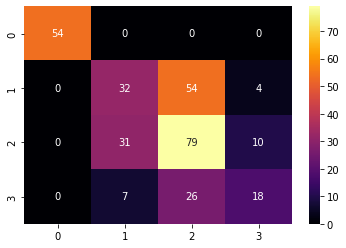

In [ ]:
model5.train(rfc_model)

# ACCURACY COMPARISON

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from load_tensors import load_data

import pickle
with open('svm.best_1.pickle', 'rb') as f:
  model = pickle.load(f)

with open('models.rfc_model_786902.pickle', 'rb') as f:
  model = pickle.load(f)

(X_train, X_test), (y_train, y_test) = load_data(flat=True, valid=False)

y_test = tf.argmax(y_test, axis=1)

svm_predictions = model.predict(X_test)
rfc_predictions = model.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_predictions)
rfc_accuracy = accuracy_score(y_test, rfc_predictions )

fig=px.bar( x=['Support Vector Classifier', 'Random Forest Classifier'],
           y=[svm_accuracy,  rfc_accuracy],
           color=['Support Vector Classifier', 'Random Forest Classifier'],
           labels={'x':"Models",'y':'Accuracy'}, range_y=[0.4,0.6])

fig.update_layout(title_text ='Model Accuracy Comparison of Machine Learning Techniques', title_x=0.5)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator SVC from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own ri

We are loading X from x_flat_no_valid.pickle and y from y_no_valid.pickle


KeyboardInterrupt: ignored

# Load prediction pickles

In [ ]:
import pickle
from load_tensors import load_data
import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import pandas as pd

def specificity_from_confusion_matrix(cm):
  fp = sum(cm[1:,0])
  n = sum(sum(cm[1:,:]))
  return 1 - (fp/n)

def generate_df(directory):
  prediction_pickles_dir = collab_dir + 'prediction_pickles/' + directory + '/'
  predictions = {}
  results = {}
  results['model'] = []
  for j in range(4):
      i = str(j)
      results[i+'_f1_scores'] = []
      results[i+'_precision'] = []
      results[i+'_recall'] = []
  results['accuracy'] = []
  results['weighted_avg_f1'] = []
  results['confusion_matrix'] = []
  results['specificity'] = []
  (_,_,_,), (_,_,y_test) = load_data()
  (_,_,_,), (_,_,y_test_old) = load_data(old=True)
  
  for filename in os.listdir(prediction_pickles_dir):
    name = filename
    with open(prediction_pickles_dir+filename, 'rb') as file:
      y_pred = pickle.load(file)
      if y_pred.__class__ == tf.Tensor:
        y_pred = y_pred.numpy()
      filetype = filename.split('.')[0]
      if filetype == 'models' or filetype == 'rfc_best' or filetype == 'svm_best':
        print(f"Model {filename} using old pickle!!!")
        yt = tf.argmax(y_test_old, axis=1)
      else:
        print(f"Model {filename} using new pickle!!!")
        yt = tf.argmax(y_test, axis=1)
      f1_scores = f1_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
      precisions = precision_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
      recalls = recall_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
      for j in range(4):
          i = str(j)
          results[i+'_f1_scores'].append(f1_scores[j])
          results[i+'_precision'].append(precisions[j])
          results[i+'_recall'].append(recalls[j])
      results['accuracy'].append(accuracy_score(yt, y_pred))
      results['model'].append(name)
      results['weighted_avg_f1'].append(f1_score(yt, y_pred, average='macro', labels=[0,1,2,3]))
      results['confusion_matrix'].append(confusion_matrix(yt, y_pred))
      results['specificity'].append(specificity_from_confusion_matrix(confusion_matrix(yt, y_pred)))
  models_df = pd.DataFrame(results)
  return models_df

models_df = []
for dir in ['basicCNN', 'transfer', 'tuned', 'vgg', 'svmrfc']:
  models_df.append(generate_df(dir))

def plot_confusion_matrix(column, row, title):
  modelname = models_df[column].iloc[row]['model']
  cm = models_df[column].iloc[row]['confusion_matrix']
  fig = px.imshow(cm, text_auto=True, color_continuous_scale='RdBu_r',
                  x=['No Cancer', 'Squamous', 'Adenocarcinoma', 'Large Cell'],
                  y=['No Cancer', 'Squamous', 'Adenocarcinoma', 'Large Cell'],
                  width=600,
                  height=600
                  )
  
  fig.update_layout(title={'text': title,
                           'y' : 0.95,
                           'x':0.6,
                           'xanchor':'center',
                           'yanchor':'top'})
  fig.show()

We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from old_y.pickle
Model BasicCNN_825757.predictions.pickle using new pickle!!!
Model Dosbol_825803.predictions.pickle using new pickle!!!
Model models.basic_cnn_825734.predictions.pickle using old pickle!!!
Model models.bigger_cnn_valid_825734.predictions.pickle using old pickle!!!
Model models.dosbol_model_826819.predictions.pickle using old pickle!!!
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from old_y.pickle
Model EfficientNetB2Model_824557.predictions.pickle using new pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model InceptionV3Model_824200.predictions.pickle using new pickle!!!
Model models.efficientnetb2_810999.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.efficientnetb2_811711.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.fixed-inceptionV3_600296.predictions.pickle using old pickle!!!
Model models.inceptionV3_598623.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.inceptionV3_598718.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.inceptionV3_598910.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.inceptionV3_599042.predictions.pickle using old pickle!!!
Model models.merged_best_423579.predictions.pickle using old pickle!!!
Model models.merged_best_with_basic_424572.predictions.pickle using old pickle!!!
Model ResNet50Model_827410.predictions.pickle using new pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model XceptionModel_828231.predictions.pickle using new pickle!!!
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from old_y.pickle
Model KerasLeakyNadam_822310.predictions.pickle using new pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model KerasLeakyNadam_826919.predictions.pickle using new pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model KerasTuner_822252.predictions.pickle using new pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model KerasTuner_826431.predictions.pickle using new pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.tuner_flex_kernel_794473.predictions.pickle using old pickle!!!
Model models.tuner_leaky_nadam_749083.predictions.pickle using old pickle!!!
Model models.tuner_nadam_1666730997.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.tuner_nadam_1666731546.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.dosbol_model_tuner_749083.predictions.pickle using old pickle!!!
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from old_y.pickle
Model models.vgg16_294926.predictions.pickle using old pickle!!!
Model models.vgg16_298460.predictions.pickle using old pickle!!!


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model models.vgg16_484151.predictions.pickle using old pickle!!!
Model models.vgg16_nadam_slow_299581.predictions.pickle using old pickle!!!
Model models.vgg16_nadam_slow_484151.predictions.pickle using old pickle!!!
Model VGG16Model_825506.predictions.pickle using new pickle!!!
We are loading X from x.pickle and y from y.pickle
We are loading X from x.pickle and y from old_y.pickle
Model rfc_best.prediction.pickle using old pickle!!!
Model svm_best.prediction.pickle using old pickle!!!


In [ ]:
#load_plotly_data(4, 1, 'Support Vector Classifier')
#load_plotly_data(4, 0, 'Random Forest Classifier')
#load_plotly_data(0, 2, 'Basic CNN')
#load_plotly_data(0, 4, 'Basic CNN with Dropout')
#load_plotly_data(2, 3, 'Keras Tuner with Dropout')
#load_plotly_data(2, 7, 'Keras Tuner with Dropout, Nadam Optimizer')
#load_plotly_data(1, 1, 'InceptionV3')
#load_plotly_data(1, 11, 'ResNet50')
#load_plotly_data(1, 12, 'Xception')
#load_plotly_data(1, 0, 'EfficientNet')
#load_plotly_data(3, 5, 'VGG16')
models_df[1]

,model,0_f1_scores,0_precision,0_recall,1_f1_scores,1_precision,1_recall,2_f1_scores,2_precision,2_recall,3_f1_scores,3_precision,3_recall,accuracy,weighted_avg_f1,confusion_matrix,specificity
0,EfficientNetB2Model_824557.predictions.pickle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551724,0.380952,1.000000,0.000000,0.000000,0.000000,0.380952,0.137931,"[[0, 0, 54, 0], [0, 0, 90, 0], [0, 0, 120, 0],...",1.000000
1,InceptionV3Model_824200.predictions.pickle,0.934579,0.943396,0.925926,0.867725,0.828283,0.911111,0.820755,0.945652,0.725000,0.754098,0.647887,0.901961,0.841270,0.844289,"[[50, 1, 2, 1], [3, 82, 1, 4], [0, 13, 87, 20]...",0.988506
2,models.efficientnetb2_810999.predictions.pickle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551724,0.380952,1.000000,0.000000,0.000000,0.000000,0.380952,0.137931,"[[0, 0, 54, 0], [0, 0, 90, 0], [0, 0, 120, 0],...",1.000000
3,models.efficientnetb2_811711.predictions.pickle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551724,0.380952,1.000000,0.000000,0.000000,0.000000,0.380952,0.137931,"[[0, 0, 54, 0], [0, 0, 90, 0], [0, 0, 120, 0],...",1.000000
4,models.fixed-inceptionV3_600296.predictions.pi...,0.000000,0.000000,0.000000,0.036585,0.040541,0.033333,0.484848,0.504505,0.466667,0.294574,0.243590,0.372549,0.247619,0.204002,"[[0, 7, 33, 14], [50, 3, 11, 26], [0, 45, 56, ...",0.800766
5,models.inceptionV3_598623.predictions.pickle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.551724,0.380952,1.000000,0.000000,0.000000,0.000000,0.380952,0.137931,"[[0, 0, 54, 0], [0, 0, 90, 0], [0, 0, 120, 0],...",1.000000
6,models.inceptionV3_598718.predictions.pickle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.619048,0.453488,0.975000,0.000000,0.000000,0.000000,0.371429,0.154762,"[[0, 0, 54, 0], [50, 0, 40, 0], [3, 0, 117, 0]...",0.781609
7,models.inceptionV3_598910.predictions.pickle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.623377,0.452830,1.000000,0.000000,0.000000,0.000000,0.380952,0.155844,"[[0, 0, 54, 0], [50, 0, 40, 0], [0, 0, 120, 0]...",0.808429
8,models.inceptionV3_599042.predictions.pickle,0.000000,0.000000,0.000000,0.050251,0.045872,0.055556,0.451613,0.505155,0.408333,0.254545,0.237288,0.274510,0.215873,0.189102,"[[0, 11, 37, 6], [50, 5, 6, 29], [0, 61, 49, 1...",0.808429
9,models.merged_best_423579.predictions.pickle,0.796875,0.689189,0.944444,0.436620,0.596154,0.344444,0.379888,0.576271,0.283333,0.497238,0.346154,0.882353,0.511111,0.527655,"[[51, 0, 3, 0], [7, 31, 21, 31], [15, 17, 34, ...",0.911877


#PLOTLY CONFUSION MATRICES

In [ ]:
# InceptionV3
plot_confusion_matrix(1,1)

In [ ]:
# Xception
plot_confusion_matrix(1, 12)

In [ ]:
# ResNet50
plot_confusion_matrix(1,11)

In [ ]:
# EfficientNetB2
plot_confusion_matrix(1, 0)

In [ ]:
# VGG16
plot_confusion_matrix(3,5)

In [ ]:
# Basic CNN
plot_confusion_matrix(0,2)

In [ ]:
# Basic CNN with Dropout
plot_confusion_matrix(0,4)

In [ ]:
plot_confusion_matrix(2, 3)

In [ ]:
#load_plotly_data(4, 0, 'Support Vector Classifier')
#load_plotly_data(4, 1, 'Random Forest Classifier')
#load_plotly_data(0, 2, 'Basic CNN')
#load_plotly_data(0, 4, 'Basic CNN with Dropout')
#load_plotly_data(2, 3, 'Keras Tuner with Dropout')
#load_plotly_data(2, 7, 'Keras Tuner with Dropout, Nadam Optimizer')
#load_plotly_data(1, 1, 'InceptionV3')
#load_plotly_data(1, 11, 'ResNet50')
#load_plotly_data(1, 12, 'Xception')
#load_plotly_data(1, 0, 'EfficientNet')
#load_plotly_data(3, 5, 'VGG16')
plot_confusion_matrix(2, 7, 'CNN Model with Keras Tuner using Nadam Optimizer')

In [ ]:

#load_plotly_data(4, 0, 'Support Vector Classifier')
#load_plotly_data(4, 1, 'Random Forest Classifier')
#load_plotly_data(0, 2, 'Basic CNN')
#load_plotly_data(0, 4, 'Basic CNN with Dropout')
#load_plotly_data(2, 3, 'Keras Tuner with Dropout')
#load_plotly_data(2, 7, 'Keras Tuner with Dropout, Nadam Optimizer')
#load_plotly_data(1, 1, 'InceptionV3')
#load_plotly_data(1, 11, 'ResNet50')
#load_plotly_data(1, 12, 'Xception')
#load_plotly_data(1, 0, 'EfficientNet')
#load_plotly_data(3, 5, 'VGG16')
plot_confusion_matrix(4,1, 'SVC Model Predictions')

In [ ]:
#load_plotly_data(4, 0, 'Support Vector Classifier')
#load_plotly_data(4, 1, 'Random Forest Classifier')
#load_plotly_data(0, 2, 'Basic CNN')
#load_plotly_data(0, 4, 'Basic CNN with Dropout')
#load_plotly_data(2, 3, 'Keras Tuner with Dropout')
#load_plotly_data(2, 7, 'Keras Tuner with Dropout, Nadam Optimizer')
#load_plotly_data(1, 1, 'InceptionV3')
#load_plotly_data(1, 11, 'ResNet50')
#load_plotly_data(1, 12, 'Xception')
#load_plotly_data(1, 0, 'EfficientNet')
#load_plotly_data(3, 5, 'VGG16')
plot_confusion_matrix(4,0, 'RFC Model Predictions')

In [ ]:
names = []
data = []
f1_scores = []
specificities = []
def load_plotly_data(frame, row, name):
  rowdata = models_df[frame].iloc[row]
  names.append(name)
  data.append(rowdata['accuracy'])
  f1_scores.append(rowdata['weighted_avg_f1'])
  specificities.append(rowdata['specificity'])

from sklearn.metrics import accuracy_score, f1_score
from load_tensors import load_data

import pickle
with open('svm.best_1.pickle', 'rb') as f:
  model = pickle.load(f)

with open('models.rfc_model_786902.pickle', 'rb') as f:
  model = pickle.load(f)

(X_train, X_test), (y_train, y_test) = load_data(flat=True, valid=False, old=True)

y_test = tf.argmax(y_test, axis=1)

svm_predictions = model.predict(X_test)
rfc_predictions = model.predict(X_test)

#names.append('Support Vector Classifier')
#data.append(accuracy_score(y_test, svm_predictions))
#f1_scores.append(f1_score(y_test, svm_predictions, average="weighted"))

#names.append('Random Forest Classifier')
#data.append(accuracy_score(y_test, rfc_predictions))
#f1_scores.append(f1_score(y_test, rfc_predictions, average="weighted"))

load_plotly_data(4, 1, 'Support Vector Classifier')
load_plotly_data(4, 0, 'Random Forest Classifier')
load_plotly_data(0, 2, 'Basic CNN')
load_plotly_data(0, 4, 'Basic CNN with Dropout')
load_plotly_data(2, 3, 'Keras Tuner with Dropout')
load_plotly_data(2, 7, 'Keras Tuner with Dropout, Nadam Optimizer')
load_plotly_data(1, 1, 'InceptionV3')
load_plotly_data(1, 11, 'ResNet50')
load_plotly_data(1, 12, 'Xception')
load_plotly_data(1, 0, 'EfficientNet')
load_plotly_data(3, 5, 'VGG16')


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your ow

We are loading X from x_flat_no_valid.pickle and y from old_y_no_valid.pickle


#PLOTLY VISUALIZATION

In [ ]:
fig=px.bar( x=names,
           y=data,
           color= names,
           labels={'x':"Models",'y':'Accuracy'}, range_y=[0.2,0.9],
           orientation='v',
           width=1000,
           height=600)

fig.update_layout(title={'text': 'Model Accuracy Comparison of Machine Learning Techniques ',
                           'y':0.95,
                           'x' : 0.55,
                           'xanchor':'center',
                           'yanchor':'top'}, showlegend=True,
                            legend=dict(orientation="h"))

fig.update_xaxes(visible=False)
fig.show()

In [ ]:
fig=px.bar( x=names,
           y=f1_scores,
           color=names,
           labels={'x':"Models",'y':'Weighted Average F1 Score'}, range_y=[0.2,0.9],
           orientation='v',
           width=1000,
           height=600)

fig.update_layout(title={'text': 'Model Weighted Average F1 Score Comparison of Machine Learning Techniques ',
                           'y':0.95,
                           'x' : 0.50,
                           'xanchor':'center',
                           'yanchor':'top'},
                  showlegend=True,
                  legend=dict(orientation="h"))

fig.update_xaxes(visible=False)
fig.show()

In [ ]:
fig=px.bar( x=names,
           y=specificities,
           color=names,
           labels={'x':"Models",'y':'Specificity on No-Cancer Diagnosis'}, range_y=[0.6,1.0],
           orientation='v',
           width=1000,
           height=600)

fig.update_layout(title={'text': 'Model Specificity Comparison of Machine Learning Techniques ',
                           'y':0.95,
                           'x' : 0.50,
                           'xanchor':'center',
                           'yanchor':'top'},
                  showlegend=True,
                  legend=dict(orientation="h"))

fig.update_xaxes(visible=False)
fig.show()

# PLOTLY GRAPHS

<b>ACCURACIES OF TRANSFER LEARNING MODELS</b>

In [ ]:
fig=px.bar( x=names[-5:],
           y=data[-5:],
           color= names[-5:],
           labels={'x':"Models",'y':'Accuracy'}, range_y=[0.2,0.9],
           orientation='v',
           width=700,
           height=600)

fig.update_layout(showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.04, xanchor="right", x=1))

fig.update_xaxes(visible=False)
fig.show()

<b>Accuracies of CNN Models comparison to SVM and RFC</b>

In [ ]:
fig=px.bar( x=names[:-5],
           y=data[:-5],
           color= names[:-5],
           labels={'x':"Models",'y':'Accuracy'}, range_y=[0.2,0.9],
           orientation='v',
           width=600,
           height=600)

fig.update_layout(showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.04, xanchor="right", x=1))

fig.update_xaxes(visible=False)
fig.show()

<b>Weighted F1 score for transfer learning models</b>

In [ ]:
fig=px.bar( x=names[-5:],
           y=f1_scores[-5:],
           color=names[-5:],
           labels={'x':"Models",'y':'Weighted Average F1 Score'}, range_y=[0.2,0.9],
           orientation='v',
           width=700,
           height=600)

fig.update_layout(showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.04, xanchor="right", x=1))

fig.update_xaxes(visible=False)
fig.show()

<b> Weighted F1 Score of CNN Models with SVM and RFC Models</b>

In [ ]:
fig=px.bar( x=names[:-5],
           y=f1_scores[:-5],
           color=names[:-5],
           labels={'x':"Models",'y':'Weighted Average F1 Score'}, range_y=[0.2,0.9],
           orientation='v',
           width=600,
           height=600)

fig.update_layout(showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.04, xanchor="right", x=1))

fig.update_xaxes(visible=False)
fig.show()

<b>Specificity for transfer learning models</b>

In [ ]:
fig=px.bar( x=names[-5:],
           y=specificities[-5:],
           color=names[-5:],
           labels={'x':"Models",'y':'Specificity'}, range_y=[0.7,1.0],
           orientation='v',
           width=700,
           height=600)

fig.update_layout(showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.04, xanchor="right", x=1))

fig.update_xaxes(visible=False)
fig.show()

<b> Specificity of CNN Models with SVM and RFC Models</b>

In [ ]:
fig=px.bar( x=names[:-5],
           y=specificities[:-5],
           color=names[:-5],
           labels={'x':"Models",'y':'Specificity'}, range_y=[0.7,1.0],
           orientation='v',
           width=600,
           height=600)

fig.update_layout(showlegend=True,
                  legend=dict(orientation="h", yanchor="bottom", y=1.04, xanchor="right", x=1))

fig.update_xaxes(visible=False)
fig.show()

# Example of KerasTuner

In [ ]:
! pip install tensorflow_addons keras_tuner
import tensorflow_addons as tfa
import keras_tuner as kt
import models.tuner_nadam as modelT
from load_tensors import load_data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
        (X_train, X_valid, X_test), (y_train, y_valid, y_test) = load_data()
        tuner = kt.RandomSearch(
            modelT.create_model,
            objective='val_accuracy',
            max_trials=2
        )
        tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
        best_model = tuner.get_best_models()[0]
        best_model.save(model3.SAVED_MODEL)
        y_pred = tf.argmax(best_model.predict(X_test), axis=1)
        y_true = tf.argmax(y_test, axis=1)
        report = classification_report(y_true, y_pred)
        cm = confusion_matrix(y_true, y_pred)

We are loading X from x.pickle and y from y.pickle
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 299, 4)       28        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 149, 4)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 149, 4)        0         
                                                                 
 flatten (Flatten)           (None, 59004)             0         
                                                                 
 dense (Dense)               (None, 64)                3776320   
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
     

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/tuner_nadam.py", line 64, in create_model
    bias_regularizer=l2(l2_scaling)))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type C

Invalid model 1/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/tuner_nadam.py", line 64, in create_model
    bias_regularizer=l2(l2_scaling)))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type C

Invalid model 2/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/tuner_nadam.py", line 64, in create_model
    bias_regularizer=l2(l2_scaling)))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type C

Invalid model 3/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/tuner_nadam.py", line 64, in create_model
    bias_regularizer=l2(l2_scaling)))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type C

Invalid model 4/5
Invalid model 5/5


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/tuner_nadam.py", line 64, in create_model
    bias_regularizer=l2(l2_scaling)))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type C

RuntimeError: ignored

In [ ]:
! pip install tensorflow_addons keras_tuner
import tensorflow_addons as tfa
import keras_tuner as kt
import models.dosbol_model_tuner as modelD
from load_tensors import load_data

(X_train, X_valid, X_test), (y_train, y_valid, y_test) = load_data()
tuner = kt.RandomSearch(
  modelD.create_model,
  objective='val_accuracy',
  max_trials=2
)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
best_model = tuner.get_best_models()[0]
#best_model.save(modelD.SAVED_MODEL)
y_pred = tf.argmax(best_model.predict(X_test), axis=1)
y_true = tf.argmax(y_test, axis=1)
report = classification_report(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
We are loading X from x.pickle and y from y.pickle
(300, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 299, 4)       28        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 149, 4)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 59004)             0         
                                                                 
 dropout (Dropout)           (None, 59004)             0         
                                                                 
 dense (Dense)               (None, 64)                3776320   
                           

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/dosbol_model_tuner.py", line 60, in create_model
    activation="relu"))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type Conv2D).

Invalid model 1/5
(300, 1)
Invalid model 2/5
(300, 1)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/dosbol_model_tuner.py", line 60, in create_model
    activation="relu"))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type Conv2D).

Invalid model 3/5
(300, 1)
Invalid model 4/5
(300, 1)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 158, in _try_build
    model = self._build_hypermodel(hp)
  File "/usr/local/lib/python3.7/dist-packages/keras_tuner/engine/tuner.py", line 146, in _build_hypermodel
    model = self.hypermodel.build(hp)
  File "/content/drive/MyDrive/Chest CT-Scan Images Data/models/dosbol_model_tuner.py", line 60, in create_model
    activation="relu"))
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/training/tracking/base.py", line 587, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/ops.py", line 1963, in _create_c_op
    raise ValueError(e.message)
ValueError: Exception encountered when calling layer "conv2d_3" (type Conv2D).

Invalid model 5/5


RuntimeError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path1 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/train"
valid_path1 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/valid"
test_path1 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/test"

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path1,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path1,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path1,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50,VGG16,ResNet101, VGG19, DenseNet201, EfficientNetB4, MobileNetV2
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(res_model.layers):
#    print(i, layer.name, "-", layer.trainable)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
model = Sequential()
model.add(res_model)
model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(N_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                      

In [ ]:
from tensorflow.keras import regularizers, optimizers
optimizer = optimizers.Adam(learning_rate= 0.001, decay= 1e-5)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=100)

In [ ]:
history_res = model.fit(train_generator,
                    steps_per_epoch = 5,
                    epochs = 5,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping]
                    )

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 1.5145 - acc: 0.5250 
Epoch 1: val_loss improved from inf to 2.20557, saving model to ./chest_CT_SCAN-ResNet50.hdf5
5/5 [==============================] - 294s 44s/step - loss: 1.5145 - acc: 0.5250 - val_loss: 2.2056 - val_acc: 0.5139
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 1.0985 - acc: 0.6812 
Epoch 2: val_loss did not improve from 2.20557
5/5 [==============================] - 208s 44s/step - loss: 1.0985 - acc: 0.6812 - val_loss: 15.2444 - val_acc: 0.2778
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 0.4937 - acc: 0.8250 
Epoch 3: val_loss did not improve from 2.20557
5/5 [==============================] - 204s 43s/step - loss: 0.4937 - acc: 0.8250 - val_loss: 116.4751 - val_acc: 0.1806
Epoch 4/5
5/5 [==============================] - ETA: 0s - loss: 0.4719 - acc: 0.8562 
Epoch 4: val_loss did not improve from 2.20557
5/5 [==============================] - 200s 42s/step - lo

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
! pip install tensorflow_addons keras_tuner
import tensorflow_addons as tfa
import keras_tuner as kt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from load_tensors import load_data

(X_train, X_valid, X_test), (y_train, y_valid, y_test) = load_data()

results = {}
results['model'] = []
for j in range(4):
    i = str(j)
    results[i+'_f1_scores'] = []
    results[i+'_precision'] = []
    results[i+'_recall'] = []
results['accuracy'] = []
results['weighted_avg_f1'] = []
yt = y_test
yt = tf.argmax(yt, axis=1)
for directory in os.listdir('saved_models/'):
    best_model = tf.keras.models.load_model('saved_models/' + directory,
                                             custom_objects={"metrics":tfa.metrics.F1Score})
    y_pred = tf.argmax(best_model.predict(X_test), axis=1)
    f1_scores = f1_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
    precisions = precision_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
    recalls = recall_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
    for j in range(4):
        i = str(j)
        results[i+'_f1_scores'].append(f1_scores[j])
        results[i+'_precision'].append(precisions[j])
        results[i+'_recall'].append(recalls[j])
    results['accuracy'].append(accuracy_score(yt, y_pred))
    results['model'].append(directory)
    results['weighted_avg_f1'].append(f1_score(yt, y_pred, average='macro', labels=[0,1,2,3]))

for pickled in ['svm.best_1.pickle', 'models.rfc_model_786902.pickle']:
    (_, _, X_test_flat), (_, _, y_test_flat) = load_data(flat=True)
    with open(pickled, 'rb') as f:
        best_model = pickle.load(f)
        y_pred = best_model.predict(X_test_flat)
        f1_scores = f1_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
        precisions = precision_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
        recalls = recall_score(yt, y_pred, average=None, labels=[0, 1, 2, 3])
        for j in range(4):
            i = str(j)
            results[i+'_f1_scores'].append(f1_scores[j])
            results[i+'_precision'].append(precisions[j])
            results[i+'_recall'].append(recalls[j])
        results['accuracy'].append(accuracy_score(yt, y_pred))
        results['model'].append(pickled)
        results['weighted_avg_f1'].append(f1_score(yt, y_pred, average='macro', labels=[0,1,2,3]))
models_df = pd.DataFrame(results)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
We are loading X from x.pickle and y from y.pickle
10/10 [==============================] - 3s 256ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



10/10 [==============================] - 4s 378ms/step
We are loading X from x_flat.pickle and y from y.pickle


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator SVC from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator RandomizedSearchCV from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations



We are loading X from x_flat.pickle and y from y.pickle


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning:

Trying to unpickle estimator RandomizedSearchCV from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. Fo

In [ ]:
models_df.head()

,model,0_f1_scores,0_precision,0_recall,1_f1_scores,1_precision,1_recall,2_f1_scores,2_precision,2_recall,3_f1_scores,3_precision,3_recall,accuracy,weighted_avg_f1
0,models.dosbol_model_826819,0.847458,0.781250,0.925926,0.623116,0.568807,0.688889,0.235294,0.545455,0.150000,0.487500,0.357798,0.764706,0.536508,0.548342
1,models.basic_cnn_825734,0.688742,0.536082,0.962963,0.615385,0.727273,0.533333,0.093023,0.666667,0.050000,0.484536,0.328671,0.921569,0.485714,0.470421
2,models.tuner_nadam_1666731546,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.629921,0.459770,1.000000,0.000000,0.000000,0.000000,0.552381,0.407480
3,models.dosbol_model_tuner_749083,0.759124,0.626506,0.962963,0.493506,0.593750,0.422222,0.350282,0.543860,0.258333,0.456790,0.333333,0.725490,0.501587,0.514926
4,svm.best_1.pickle,0.925926,0.925926,0.925926,0.455446,0.410714,0.511111,0.335025,0.428571,0.275000,0.471545,0.402778,0.568627,0.501587,0.546985


In [ ]:
from sklearn.metrics import accuracy_score
from load_tensors import load_data

svm_accuracy = models_df['accuracy'][4]
basic_cnn_accuracy = models_df['accuracy'][1]
dropout_cnn_accuracy = models_df['accuracy'][0]
tuner_nadam_accuracy = models_df['accuracy'][2]
droput_cnn_tuning_accuracy = models_df['accuracy'][3]



fig=px.bar( x=['Support Vector Classifier', 'Basic CNN', 'CNN Model with Dropout', 'Dropout CNN Model with Tuning', 'Best CNN Model using Keras Tuner'],
           y=[svm_accuracy, basic_cnn_accuracy, dropout_cnn_accuracy, tuner_nadam_accuracy, droput_cnn_tuning_accuracy],
           color=['Support Vector Classifier', 'Basic CNN', 'CNN Model with Dropout', 'Dropout CNN Model with Tuning', 'Best CNN Model using Keras Tuner'],
           labels={'x':"Models",'y':'Accuracy'}, range_y=[0.2,0.7])

fig.update_layout(title_text ='Model Accuracy Comparison of Different Models', title_x=0.5)
fig.show()

In [ ]:
from sklearn.metrics import accuracy_score
from load_tensors import load_data

svm_precision = models_df['0_precision'][4]
basic_cnn_precision = models_df['0_precision'][1]
dropout_cnn_precision = models_df['0_precision'][0]
tuner_nadam_precision = models_df['0_precision'][2]
droput_cnn_tuning_precision = models_df['0_precision'][3]



fig=px.bar( x=['Support Vector Classifier', 'Basic CNN', 'CNN Model with Dropout', 'Dropout CNN Model with Tuning', 'Best CNN Model using Keras Tuner'],
           y=[svm_precision, basic_cnn_precision, dropout_cnn_precision, tuner_nadam_precision, droput_cnn_tuning_precision],
           color=['Support Vector Classifier', 'Basic CNN', 'CNN Model with Dropout', 'Dropout CNN Model with Tuning', 'Best CNN Model using Keras Tuner'],
           labels={'x':"Models",'y':'Precision on Non-Cancer Classification'}, range_y=[0.1,1.0])

fig.update_layout(title_text ='Model Precision Comparison of Different Models', title_x=0.5)
fig.show()

<h3><b>TRANSFER LEARNING MODELS </b></h3>

#INCEPTION V3 MODEL

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf

In [ ]:
train_path2 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/train"
valid_path2 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/valid"
test_path2 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path2, target_size=(224,224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path2, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 612 images belonging to 4 classes.
Found 314 images belonging to 4 classes.


In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# making the last 15 layers non-trainable
for layer in InceptionV3_model.layers[:-15]:
  layer.trainable = False
    
model = Sequential()
model.add(InceptionV3_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))


In [ ]:
loss = CategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                        

In [ ]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=8,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(test_generator))

Epoch 1/8
20/20 [==============================] - 189s 9s/step - loss: 1.3011 - accuracy: 0.4314 - val_loss: 1.5573 - val_accuracy: 0.4904
Epoch 2/8
20/20 [==============================] - 108s 5s/step - loss: 0.9811 - accuracy: 0.5915 - val_loss: 0.7490 - val_accuracy: 0.6688
Epoch 3/8
20/20 [==============================] - 106s 5s/step - loss: 0.7795 - accuracy: 0.6863 - val_loss: 0.7038 - val_accuracy: 0.6815
Epoch 4/8
20/20 [==============================] - 115s 6s/step - loss: 0.5824 - accuracy: 0.7533 - val_loss: 0.7011 - val_accuracy: 0.7038
Epoch 5/8
20/20 [==============================] - 108s 5s/step - loss: 0.5667 - accuracy: 0.7843 - val_loss: 1.1136 - val_accuracy: 0.6051
Epoch 6/8
20/20 [==============================] - 108s 6s/step - loss: 0.4306 - accuracy: 0.8284 - val_loss: 0.7087 - val_accuracy: 0.7102
Epoch 7/8
20/20 [==============================] - 113s 6s/step - loss: 0.3050 - accuracy: 0.8840 - val_loss: 0.5140 - val_accuracy: 0.8153
Epoch 8/8
20/20 [===

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 34s 3s/step - loss: 0.6828 - accuracy: 0.7866


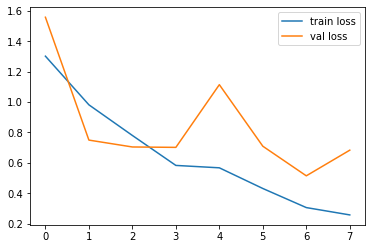

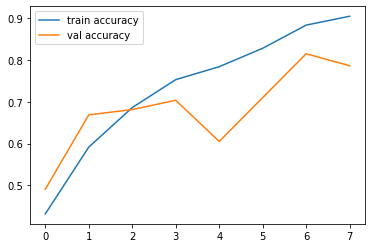

In [ ]:
# plotting the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plotting the accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# COMPARISON OF INCEPTION_V3 MODEL WITH ALL LAYERS NON-TRAINABLE

In [ ]:
InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
# making all the layers in the pre-trained model non-trainable
for layer in InceptionV3_model.layers:
  layer.trainable = False
    
model = Sequential()
model.add(InceptionV3_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))


In [ ]:
loss = CategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                        

In [ ]:
train_history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=8,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(test_generator))

Epoch 1/8
20/20 [==============================] - 233s 11s/step - loss: 1.5285 - accuracy: 0.3758 - val_loss: 1.1484 - val_accuracy: 0.4522
Epoch 2/8
20/20 [==============================] - 113s 6s/step - loss: 1.1588 - accuracy: 0.4739 - val_loss: 0.9374 - val_accuracy: 0.5446
Epoch 3/8
20/20 [==============================] - 114s 6s/step - loss: 0.9220 - accuracy: 0.5556 - val_loss: 0.8617 - val_accuracy: 0.6083
Epoch 4/8
20/20 [==============================] - 115s 6s/step - loss: 0.8699 - accuracy: 0.5817 - val_loss: 0.9147 - val_accuracy: 0.5287
Epoch 5/8
20/20 [==============================] - 115s 6s/step - loss: 0.8240 - accuracy: 0.6078 - val_loss: 0.7952 - val_accuracy: 0.6688
Epoch 6/8
20/20 [==============================] - 107s 5s/step - loss: 0.7573 - accuracy: 0.6373 - val_loss: 0.7516 - val_accuracy: 0.6815
Epoch 7/8
20/20 [==============================] - 114s 6s/step - loss: 0.8005 - accuracy: 0.6356 - val_loss: 0.7819 - val_accuracy: 0.6847
Epoch 8/8
20/20 [==

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 35s 3s/step - loss: 0.7394 - accuracy: 0.7197


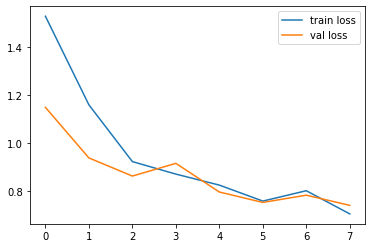

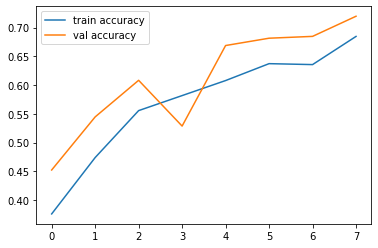

In [ ]:
# plotting the loss
plt.plot(train_history.history['loss'], label='train loss')
plt.plot(train_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plotting the accuracy
plt.plot(train_history.history['accuracy'], label='train accuracy')
plt.plot(train_history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

As we from the above results, the accuracy slight decreased from 78.66% to 71.97% when we made all the layers of the pre-trained Inception_V3 model non-trainable. But the accuracy attained with all layers of pre-trained Inception_V3 model non-trainable is still pretty good with minimal loss.

# XCEPTION MODEL

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf

In [ ]:
train_path3 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/train"
valid_path3 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/valid"
test_path3 = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path3, target_size=(299,299), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path3, target_size=(299,299), batch_size=32, class_mode='categorical')

Found 612 images belonging to 4 classes.
Found 314 images belonging to 4 classes.


In [ ]:
Xception_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(299,299,3))    # keeping the input image size (299,299) 

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
# making the last 15 layers non-trainable
for layer in Xception_model.layers[:-15]:
  layer.trainable = False
    
model = Sequential()
model.add(Xception_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))


In [ ]:
loss = CategoricalCrossentropy()
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                      

In [ ]:
training_history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=8,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(test_generator))

Epoch 1/8
20/20 [==============================] - 425s 21s/step - loss: 1.1740 - accuracy: 0.4510 - val_loss: 2.9203 - val_accuracy: 0.3248
Epoch 2/8
20/20 [==============================] - 407s 21s/step - loss: 0.7547 - accuracy: 0.6716 - val_loss: 1.9710 - val_accuracy: 0.5637
Epoch 3/8
20/20 [==============================] - 409s 21s/step - loss: 0.4492 - accuracy: 0.8268 - val_loss: 3.6261 - val_accuracy: 0.5191
Epoch 4/8
20/20 [==============================] - 406s 21s/step - loss: 0.3717 - accuracy: 0.8578 - val_loss: 2.8244 - val_accuracy: 0.6083
Epoch 5/8
20/20 [==============================] - 403s 20s/step - loss: 0.3558 - accuracy: 0.8676 - val_loss: 1.1881 - val_accuracy: 0.7611
Epoch 6/8
20/20 [==============================] - 410s 21s/step - loss: 0.2336 - accuracy: 0.9248 - val_loss: 1.2847 - val_accuracy: 0.7643
Epoch 7/8
20/20 [==============================] - 402s 20s/step - loss: 0.1759 - accuracy: 0.9428 - val_loss: 0.7433 - val_accuracy: 0.8185
Epoch 8/8
20/

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 107s 11s/step - loss: 0.6620 - accuracy: 0.8153


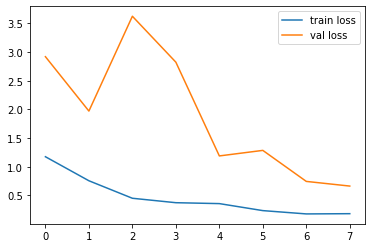

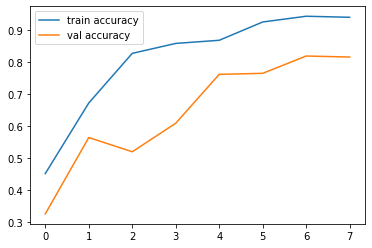

In [ ]:
# plotting the loss
plt.plot(training_history.history['loss'], label='train loss')
plt.plot(training_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plotting the accuracy
plt.plot(training_history.history['accuracy'], label='train accuracy')
plt.plot(training_history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

# RESNET50 MODEL 


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pathlib as pa
import glob
import matplotlib.pyplot as plt

In [ ]:
train = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/train"
test = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/test"

In [ ]:
IMG_SIZE=[224,224]
BATCH_SIZE=32
train_ds=tf.keras.utils.image_dataset_from_directory(train,validation_split=0.2,subset='training',shuffle=True,
                                                     batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=123)
valid_ds=tf.keras.utils.image_dataset_from_directory(train,validation_split=0.2,subset='validation',shuffle=True,
                                                     batch_size=BATCH_SIZE,image_size=IMG_SIZE,seed=123)
test_t = tf.keras.utils.image_dataset_from_directory(test, shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 612 files belonging to 4 classes.
Using 490 files for training.
Found 612 files belonging to 4 classes.
Using 122 files for validation.
Found 314 files belonging to 4 classes.


In [ ]:
IMG_SHAPE = IMG_SIZE + [3]
base_model = ResNet50(input_shape=IMG_SHAPE, weights='imagenet', include_top=False)
# base_model.summary() # commented out because it was taking so much space

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False
# base_model.summary() # commented out because it was taking so much space

In [ ]:
base_model.trainable = False
# base_model.summary() # I commented out because it was taking so much space

In [ ]:
N_CLASSES = 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(N_CLASSES, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4)                 401412    
                                                        

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 batch_normalization (BatchN  (None, 100352)           401408    
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 4)                 401412    
                                                        

In [ ]:
history = model.fit(train_ds,
                    validation_data=test_t,
                    epochs=8,
                    steps_per_epoch=len(train_ds),
                    validation_steps=len(test_t))

Epoch 1/8
16/16 [==============================] - 201s 13s/step - loss: 0.3695 - accuracy: 0.9306 - val_loss: 4.5152 - val_accuracy: 0.5191
Epoch 2/8
16/16 [==============================] - 159s 10s/step - loss: 0.1352 - accuracy: 0.9612 - val_loss: 4.0587 - val_accuracy: 0.5510
Epoch 3/8
16/16 [==============================] - 167s 11s/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 2.7138 - val_accuracy: 0.6688
Epoch 4/8
16/16 [==============================] - 149s 9s/step - loss: 0.0165 - accuracy: 0.9939 - val_loss: 2.5081 - val_accuracy: 0.6879
Epoch 5/8
16/16 [==============================] - 179s 11s/step - loss: 0.0137 - accuracy: 0.9918 - val_loss: 2.5233 - val_accuracy: 0.6815
Epoch 6/8
16/16 [==============================] - 162s 10s/step - loss: 0.0205 - accuracy: 0.9939 - val_loss: 2.5936 - val_accuracy: 0.7006
Epoch 7/8
16/16 [==============================] - 140s 9s/step - loss: 0.0046 - accuracy: 0.9980 - val_loss: 2.5635 - val_accuracy: 0.6847
Epoch 8/8
16/16

#EfficientNetB2 MODEL

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense,Activation, Flatten, Dropout, Conv2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras import regularizers, optimizers
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Nadam, Adam

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
train_path = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/train"
valid_path = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/valid"
test_path = "/content/drive/MyDrive/Chest CT-Scan Images Data/Data/test" 

In [ ]:
image_shape = (224,224,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=BATCH_SIZE, class_mode='categorical')

Found 612 images belonging to 4 classes.
Found 314 images belonging to 4 classes.


In [ ]:
efficientNet_model = EfficientNetB2(include_top=False, weights='imagenet', input_shape = (image_shape))

In [ ]:
# making last 15 layers in the pre-trained model non-trainable
for layer in efficientNet_model.layers:
  layer.trainable = False
    
model = Sequential()
model.add(efficientNet_model)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(N_CLASSES, activation='softmax'))


In [ ]:
loss = CategoricalCrossentropy()
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 global_average_pooling2d_2   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_2 (Flatten)         (None, 1408)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)              1442816   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 1024)              1049600   
                                                      

In [ ]:
#checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Chest CT-Scan Images Data/Data/',
                            #monitor='val_loss', verbose = 1,
                            #save_best_only=True)
#early_stopping = EarlyStopping(verbose=1, patience=15)

In [ ]:
history_efficient = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=24,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(test_generator))


Epoch 1/24
20/20 [==============================] - 24s 705ms/step - loss: 1.4213 - accuracy: 0.3023 - val_loss: 1.3625 - val_accuracy: 0.1943
Epoch 2/24
20/20 [==============================] - 12s 604ms/step - loss: 1.3834 - accuracy: 0.3137 - val_loss: 1.3383 - val_accuracy: 0.5350
Epoch 3/24
20/20 [==============================] - 12s 596ms/step - loss: 1.3661 - accuracy: 0.3382 - val_loss: 1.3074 - val_accuracy: 0.4586
Epoch 4/24
20/20 [==============================] - 12s 600ms/step - loss: 1.3456 - accuracy: 0.3693 - val_loss: 1.3021 - val_accuracy: 0.5510
Epoch 5/24
20/20 [==============================] - 12s 597ms/step - loss: 1.3206 - accuracy: 0.3546 - val_loss: 1.2669 - val_accuracy: 0.4554
Epoch 6/24
20/20 [==============================] - 12s 588ms/step - loss: 1.3274 - accuracy: 0.3807 - val_loss: 1.2470 - val_accuracy: 0.4554
Epoch 7/24
20/20 [==============================] - 12s 596ms/step - loss: 1.3085 - accuracy: 0.3971 - val_loss: 1.2400 - val_accuracy: 0.5510

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 2s 219ms/step - loss: 1.1457 - accuracy: 0.5478
